In [1]:
%%javascript
/**********************************************************************************************
Known Mathjax Issue with Chrome - a rounding issue adds a border to the right of mathjax markup
https://github.com/mathjax/MathJax/issues/1300
A quick hack to fix this based on stackoverflow discussions:
http://stackoverflow.com/questions/34277967/chrome-rendering-mathjax-equations-with-a-trailing-vertical-line
**********************************************************************************************/

$('.math>span').css("border-left-color","transparent")

<IPython.core.display.Javascript object>

In [2]:
%reload_ext autoreload
%autoreload 2

# DAMLAS - Machine Learning At Scale
## Assignment - HW3
Data Analytics and Machine Learning at Scale
Target, Minneapolis

---
__Name:__  Niki Deeny   
__Class:__ DAMLAS (Summer 2016)     
__Email:__  niki.deeny@Target.com     
__Week:__   03

# Table of Contents <a name="TOC"></a> 

1.  [HW Introduction](#1)   
2.  [HW References](#2)
3.  [HW Problems](#3)   
    3.0.  [Short Answer Questions](#HW3.0)    
    3.1.  [Word Count plus sorting](#HW3.1)   
    3.2.  [MLlib-centric Kmeans](#HW3.2)    
    3.3.  [Homegrown KMeans in Spark](#HW3.3)    
    3.4.  [Making Homegrown KMeans more efficient](#HW3.4)  
    3.5.  [OPTIONAL Weighted KMeans](#HW3.5)  
    3.6.  [OPTIONAL Linear Regression](#HW3.6)  
    3.7.  [OPTIONAL Error surfaces](#HW3.7)



<a name="1">
# 1 Instructions
[Back to Table of Contents](#TOC)
* Homework submissions are due by Tueday, 08/02/2016 at 11AM (CT).


* Prepare a single Jupyter note, please include questions, and question numbers in the questions and in the responses.
Submit your homework notebook via the following form:

   + [Submission Link - Google Form](http://goo.gl/forms/er3OFr5eCMWDngB72)


### Documents:
* IPython Notebook, published and viewable online.
* PDF export of IPython Notebook.
    
<a name="2">
# 2 Useful References
[Back to Table of Contents](#TOC)

* Karau, Holden, Konwinski, Andy, Wendell, Patrick, & Zaharia, Matei. (2015). Learning Spark: Lightning-fast big data analysis. Sebastopol, CA: O’Reilly Publishers.
* Hastie, Trevor, Tibshirani, Robert, & Friedman, Jerome. (2009). The elements of statistical learning: Data mining, inference, and prediction (2nd ed.). Stanford, CA: Springer Science+Business Media. __(Download for free [here](http://statweb.stanford.edu/~tibs/ElemStatLearn/printings/ESLII_print10.pdf))__
* Ryza, Sandy, Laserson, Uri, Owen, Sean, & Wills, Josh. (2015). Advanced analytics with Spark: Patterns for learning from data at scale. Sebastopol, CA: O’Reilly Publishers.
---
* [Slides for Supervised-ML-Classification-via-GradientDescent](https://www.dropbox.com/s/uzoch1dwft8kaqw/Lecture-15-Supervised-ML-Classification-via-GradientDescent.pdf?dl=0)
* [Slides from High Entropy Friday]( https://www.dropbox.com/s/0dlvsff3660vvbk/Lecture-High-Entropy-Friday.pdf?dl=0)

---

<a name="HW3">
# 3 HW Problems
[Back to Table of Contents](#TOC)

<a name="3.0"></a><h2 style="color:darkblue"> HW3.0: Short answer questions </h2>
[Back to Table of Contents](#TOC)


__What is Apache Spark and how is it different to Apache Hadoop? __  
Apache Spark is an open source software web application framework and domain-specific language written in Java. Spark runs on Hadoop.

__Fill in the blanks:
Spark API consists of interfaces to develop applications based on it in Java, __ BLANKS __ languages (list languages). __  
Scala, Python, R

__Using Spark, resource management can be done either in a single server instance or using a framework such as Mesos or ????? in a distributed manner. __  
YARN

__What is an RDD and show a fun example of creating one and bringing the first element back to the driver program. __  
Resilient Distributed Datasets (RDD) is a fundamental data structure of Spark. It is an immutable distributed collection of objects. Each dataset in RDD is divided into logical partitions, which may be computed on different nodes of the cluster.

In [101]:
rdd = sc.parallelize(["#epicfail",  "#hadoop", "#rstats",  "#rstudio", "#rstats", "#spark", "#hadoop", "#hdfs",
"#hadoop",  "#oreilly", "#spark", "#python", "#spark", "#scala", "#spark", "#strataconf", "#strataconf", "#oreilly",
"#spark", "#databricks", "#hadoop", "#hdfs", "#spark",  "#hdfs"], 4)

print rdd.take(1)[0]

#epicfail


<a name="HW3.1"> <h2 style="color:darkgreen">HW3.1 WordCount plus sorting </h2>
[Back to Table of Contents](#TOC)

The following notebooks will be useful to jumpstart this collection of Homework exercises:


* [Example Notebook with Debugging tactics in Spark](http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/jqjllp8kmf1eolk/WordCountDebugging-Example.ipynb)
* [Word Count Quiz](http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/vgmpivsi4rvqz0s/WordCountQuiz.ipynb)
* [Work Count Solution](http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/dxv3dmp1vluuo8i/WordCountQuiz-Solution.ipynb)

---
In Spark write the code to count how often each word appears in a text document (or set of documents). Please use this homework document (with no solutions in it) as a the example document to run an experiment.  Report the following: 
* provide a sorted list of tokens in decreasing order of frequency of occurence limited to [top 20 most frequent only] and [bottom 10 least frequent]. 


__OPTIONAL__ 
Feel free to do a secondary sort where words with the same frequncy are sorted alphanumerically increasing. Plseas refer to the [following notebook](http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/uu5afr3ufpm9fy8/SecondarySort.ipynb)
 for examples of secondary sorts in Spark. Please provide the following [top 20 most frequent terms only] and [bottom 10 least frequent terms]

__NOTE__ [Please incorporate all referenced notebooks directly into this master notebook as cells for HW submission. I.e., HW submissions should comprise of just one notebook]

Setting up Spark Locally

In [16]:
import os
import sys #current as of 9/26/2015

# spark_home = os.environ['SPARK_HOME'] = '/Users/jshanahan/Dropbox/Lectures-UC-Berkeley-ML-Class-2015/spark-1.6.1-bin-hadoop2.6/'
spark_home = os.environ['SPARK_HOME'] = '/users/z084224/Downloads/spark-1.6.2-bin-hadoop2.6'
if not spark_home:
    raise ValueError('SPARK_HOME enviroment variable is not set')
sys.path.insert(0,os.path.join(spark_home,'python'))
sys.path.insert(0,os.path.join(spark_home,'python/lib/py4j-0.9-src.zip'))

# First, we initialize the Spark environment

# import findspark
#findspark.init()

import pyspark
from pyspark.sql import SQLContext

# # We can give a name to our app (to find it in Spark WebUI) and configure execution mode
# # In this case, it is local multicore execution with "local[*]"
app_name = "example-logs"
master = "local[*]"

# Don't run this stuff twice
conf = pyspark.SparkConf().setAppName(app_name).setMaster(master)
sc = pyspark.SparkContext(conf=conf)
sqlContext = SQLContext(sc)


print(sc)
print(sqlContext)


# # Import some libraries to work with dates
import dateutil.parser
import dateutil.relativedelta as dateutil_rd

ValueError: Cannot run multiple SparkContexts at once; existing SparkContext(app=example-logs, master=local[*]) created by __init__ at <ipython-input-3-6c444579f3f5>:26 

Save the homework notebook (no solutions) as a text file

In [125]:
!curl -L http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/u07do0bv73vkxvc/DAMLAS-HW03-Template-2016-07-22.ipynb > hw_words.ipynb

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 38843    0 38843    0     0   8579      0 --:--:--  0:00:04 --:--:--  9715


In [275]:
!tail HW3.txt










------- END OF HWK 9 --------

Word Counts

In [278]:
logFileNAME = 'HW3.txt'
text_file = sc.textFile(logFileNAME)
words = text_file.flatMap(lambda line: line.strip().split(" ")) \
    .map(lambda word: (word, 1)) \
    .reduceByKey(lambda a, b: a + b, 1)

MostFreq = words.sortBy(lambda a: a[1],0).take(20)
print "Top 20 Most Freq"
for v in MostFreq:
    print v

LeastFreq = words.sortBy(lambda a: a[1],1).take(10)
print "========================================"
print "Top 10 Least Freq"
for v in LeastFreq:
    print v

Top 20 Most Freq
(u'the', 71)
(u'of', 49)
(u'and', 40)
(u'to', 33)
(u'in', 32)
(u'##', 27)
(u'a', 23)
(u'this', 17)
(u'Contents', 17)
(u'Table', 17)
(u'for', 17)
(u'Back', 16)
(u'with', 14)
(u'as', 13)
(u'&', 12)
(u'data', 12)
(u'KMeans', 12)
(u'', 11)
(u'code', 11)
(u'here', 11)
Top 10 Least Freq
(u'limited', 1)
(u'forget', 1)
(u'Here@Target.com', 1)
(u'during', 1)
(u'Holden,', 1)
(u'consists', 1)
(u'inverse', 1)
(u'HW3.1', 1)
(u'graph', 1)
(u'HW3.7', 1)


<a name="HW3.1.1"><h2 style="color:darkgreen">HW3.1.1 </h2>
[Back to Table of Contents](#TOC)

Modify the above word count code to count words that begin with lower case letters (a-z) and report your findings. Again sort the output words in decreasing order of frequency.


In [81]:
import re

logFileNAME = 'hw_words.txt'
text_file = sc.textFile(logFileNAME)
words = text_file.flatMap(lambda line: re.findall(r'\b[a-z]\w+\b', line)) \ #filter on lowercase
    .map(lambda word: (word, 1)) \
    .reduceByKey(lambda a, b: a + b, 1)

MostFreq = words.sortBy(lambda a: a[1],0).take(20)
print "Top 20 Most Freq"
for v in MostFreq:
    print v

LeastFreq = words.sortBy(lambda a: a[1],1).take(10)
print "========================================"
print "Top 10 Least Freq"
for v in LeastFreq:
    print v

Top 20 Most Freq
(u'div', 518)
(u'class', 329)
(u'span', 176)
(u'the', 74)
(u'href', 69)
(u'border', 67)
(u'box', 63)
(u'sizing', 63)
(u'li', 60)
(u'pre', 60)
(u'of', 54)
(u'cell', 47)
(u'prompt', 47)
(u'input_prompt', 46)
(u'rendered', 46)
(u'inner_cell', 46)
(u'and', 41)
(u'in', 41)
(u'script', 37)
(u'to', 36)
Top 10 Least Freq
(u'tibs', 1)
(u'limited', 1)
(u'gt', 1)
(u'forget', 1)
(u'vgmpivsi4rvqz0s', 1)
(u'per', 1)
(u'edu', 1)
(u'consists', 1)
(u'gl', 1)
(u'centers', 1)


<a name="HW3.2"> <h2 style="color:darkblue"> HW3.2: MLlib-centric KMeans</h2>
[Back to Table of Contents](#TOC)

Using the following  MLlib-centric KMeans code snippet: 

<pre>
from pyspark.mllib.clustering import KMeans, KMeansModel
from numpy import array
from math import sqrt


# Load and parse the data
# NOTE  kmeans_data.txt is available here 
#          https://www.dropbox.com/s/q85t0ytb9apggnh/kmeans_data.txt?dl=0 
data = sc.textFile("kmeans_data.txt")  
parsedData = data.map(lambda line: array([float(x) for x in line.split(' ')]))

# Build the model (cluster the data)
clusters = KMeans.train(parsedData, 2, maxIterations=10,
        runs=10, initializationMode="random")

# Evaluate clustering by computing Within Set Sum of Squared Errors
def error(point):
    center = clusters.centers[clusters.predict(point)]
    return sqrt(sum([x**2 for x in (point - center)]))

WSSSE = parsedData.map(lambda point: error(point)).reduce(lambda x, y: x + y)
print("Within Set Sum of Squared Error = " + str(WSSSE))

# Save and load model
clusters.save(sc, "myModelPath")
sameModel = KMeansModel.load(sc, "myModelPath")

</pre>

__NOTE__ <p> The  __kmeans_data.txt__ is available here https://www.dropbox.com/s/q85t0ytb9apggnh/kmeans_data.txt?dl=0 

__TASKS__
* Run this code snippet and list the clusters that your find.
* compute the Within Set Sum of Squared Errors for the found clusters. Comment on your findings.

In [82]:
!curl -L https://www.dropbox.com/s/q85t0ytb9apggnh/kmeans_data.txt?dl=0 > kmeans_data.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100    72  100    72    0     0     29      0  0:00:02  0:00:02 --:--:-- 72000


In [99]:
from pyspark.mllib.clustering import KMeans, KMeansModel
from numpy import array
from math import sqrt

# Load and parse the data
# NOTE  kmeans_data.txt is available here 
#          https://www.dropbox.com/s/q85t0ytb9apggnh/kmeans_data.txt?dl=0 
data = sc.textFile("kmeans_data.txt")  
parsedData = data.map(lambda line: array([float(x) for x in line.split(' ')]))

# Build the model (cluster the data)
clusters = KMeans.train(parsedData, 2, maxIterations=10,
        runs=10, initializationMode="random")

# Evaluate clustering by computing Within Set Sum of Squared Errors
def error(point):
    center = clusters.centers[clusters.predict(point)]
    return sqrt(sum([x**2 for x in (point - center)]))

WSSSE = parsedData.map(lambda point: error(point)).reduce(lambda x, y: x + y)
print("Within Set Sum of Squared Error = " + str(WSSSE))

# Save and load model
clusters.save(sc, "myModelPath")
sameModel = KMeansModel.load(sc, "myModelPath")

Within Set Sum of Squared Error = 0.692820323028


Py4JJavaError: An error occurred while calling o1156.save.
: org.apache.hadoop.mapred.FileAlreadyExistsException: Output directory file:/Users/z084224/Downloads/myModelPath/metadata already exists
	at org.apache.hadoop.mapred.FileOutputFormat.checkOutputSpecs(FileOutputFormat.java:132)
	at org.apache.spark.rdd.PairRDDFunctions$$anonfun$saveAsHadoopDataset$1.apply$mcV$sp(PairRDDFunctions.scala:1177)
	at org.apache.spark.rdd.PairRDDFunctions$$anonfun$saveAsHadoopDataset$1.apply(PairRDDFunctions.scala:1154)
	at org.apache.spark.rdd.PairRDDFunctions$$anonfun$saveAsHadoopDataset$1.apply(PairRDDFunctions.scala:1154)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:150)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:111)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:316)
	at org.apache.spark.rdd.PairRDDFunctions.saveAsHadoopDataset(PairRDDFunctions.scala:1154)
	at org.apache.spark.rdd.PairRDDFunctions$$anonfun$saveAsHadoopFile$4.apply$mcV$sp(PairRDDFunctions.scala:1060)
	at org.apache.spark.rdd.PairRDDFunctions$$anonfun$saveAsHadoopFile$4.apply(PairRDDFunctions.scala:1026)
	at org.apache.spark.rdd.PairRDDFunctions$$anonfun$saveAsHadoopFile$4.apply(PairRDDFunctions.scala:1026)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:150)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:111)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:316)
	at org.apache.spark.rdd.PairRDDFunctions.saveAsHadoopFile(PairRDDFunctions.scala:1026)
	at org.apache.spark.rdd.PairRDDFunctions$$anonfun$saveAsHadoopFile$1.apply$mcV$sp(PairRDDFunctions.scala:952)
	at org.apache.spark.rdd.PairRDDFunctions$$anonfun$saveAsHadoopFile$1.apply(PairRDDFunctions.scala:952)
	at org.apache.spark.rdd.PairRDDFunctions$$anonfun$saveAsHadoopFile$1.apply(PairRDDFunctions.scala:952)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:150)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:111)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:316)
	at org.apache.spark.rdd.PairRDDFunctions.saveAsHadoopFile(PairRDDFunctions.scala:951)
	at org.apache.spark.rdd.RDD$$anonfun$saveAsTextFile$1.apply$mcV$sp(RDD.scala:1457)
	at org.apache.spark.rdd.RDD$$anonfun$saveAsTextFile$1.apply(RDD.scala:1436)
	at org.apache.spark.rdd.RDD$$anonfun$saveAsTextFile$1.apply(RDD.scala:1436)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:150)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:111)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:316)
	at org.apache.spark.rdd.RDD.saveAsTextFile(RDD.scala:1436)
	at org.apache.spark.mllib.clustering.KMeansModel$SaveLoadV1_0$.save(KMeansModel.scala:131)
	at org.apache.spark.mllib.clustering.KMeansModel.save(KMeansModel.scala:96)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:497)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:231)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:381)
	at py4j.Gateway.invoke(Gateway.java:259)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:133)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:209)
	at java.lang.Thread.run(Thread.java:745)


In [98]:
print clusters.__dict__

{'centers': [array([ 0.1,  0.1,  0.1]), array([ 9.1,  9.1,  9.1])]}


#### Comments

There are 2 clusters with centroids (0.1,  0.1,  0.1) and (9.1,  9.1,  9.1)  
Within Set Sum of Squared Error = 0.692820323028  

The standard KMeans algorithm aims at minimizing the sum of squares of the distance between the points of each set: the squared Euclidean distance. This is the WCSS objective. You would use this WSSSE to evaluate your model compared to others. There is no other model here so I can't really comment on what WSSSE = 0.69 means.

<a name="HW3.3"><h2 style="color:darkgreen"> HW3.3: Homegrown KMeans in Spark </h2>
[Back to Table of Contents](#TOC)

Download the following KMeans [notebook](http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/3nsthvp8g2rrrdh/EM-Kmeans.ipynb).

Generate 3 clusters with 100 (one hundred) data points per cluster (using the code provided). Plot the data.
Then run MLlib's Kmean implementation on this data  and report your results as follows:

* plot the resulting clusters after 1 iteration, 10 iterations, after 20 iterations, after 100 iterations.
* in each plot please report the Within Set Sum of Squared Errors for the found clusters (as part of the title WSSSE). Comment on the progress of this measure as  the KMEans algorithms runs for more iterations. Then plot the WSSSE as a function of the iteration (1, 10, 20, 30, 40, 50, 100).



Generating & Plotting 3 Clusters with 100 data points per cluster

In [102]:
 %matplotlib inline
import numpy as np
import pylab 
import json
size1 = size2 = size3 = 100
samples1 = np.random.multivariate_normal([4, 0], [[1, 0],[0, 1]], size1)
data = samples1
samples2 = np.random.multivariate_normal([6, 6], [[1, 0],[0, 1]], size2)
data = np.append(data,samples2, axis=0)
samples3 = np.random.multivariate_normal([0, 4], [[1, 0],[0, 1]], size3)
data = np.append(data,samples3, axis=0)
# Randomlize data
data = data[np.random.permutation(size1+size2+size3),]
np.savetxt('data.csv',data,delimiter = ',')

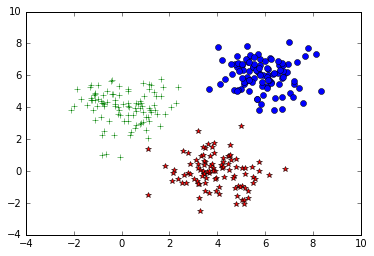

In [104]:
pylab.plot(samples1[:, 0], samples1[:, 1],'*', color = 'red')
pylab.plot(samples2[:, 0], samples2[:, 1],'o',color = 'blue')
pylab.plot(samples3[:, 0], samples3[:, 1],'+',color = 'green')
pylab.show()

MLlibs KMeans Implementation

In [253]:
import numpy as np

#Calculate which class each data point belongs to
def nearest_centroid(line):
    x = np.array([float(f) for f in line.split(',')])
    closest_centroid_idx = np.sum((x - centroids)**2, axis=1).argmin()
    return (closest_centroid_idx,(x,1))

#plot centroids and data points for each iteration
def plot_iteration(means):
    pylab.plot(samples1[:, 0], samples1[:, 1], '.', color = 'blue')
    pylab.plot(samples2[:, 0], samples2[:, 1], '.', color = 'blue')
    pylab.plot(samples3[:, 0], samples3[:, 1],'.', color = 'blue')
    pylab.plot(means[0][0], means[0][1],'*',markersize =10,color = 'red')
    pylab.plot(means[1][0], means[1][1],'*',markersize =10,color = 'red')
    pylab.plot(means[2][0], means[2][1],'*',markersize =10,color = 'red')
    pylab.show()

In [262]:
from pyspark.mllib.clustering import KMeans, KMeansModel
from numpy import array
from math import sqrt

def kmeans(NumberOfIterations):

    # Load and parse the data
    data = sc.textFile("data.csv")
    parsedData = data.map(lambda line: array([float(x) for x in line.split(',')]))

    # Build the model (cluster the data)
    clusters = KMeans.train(parsedData, 3, maxIterations=NumberOfIterations,
            initializationMode="random")
    for centroid in clusters.centers:
        print centroid

    # Plot final centroids
    plot_iteration(clusters.centers)

    # Evaluate clustering by computing Within Set Sum of Squared Errors
    def error(point):
        center = clusters.centers[clusters.predict(point)]
        return sqrt(sum([x**2 for x in (point - center)]))

    WSSSE = parsedData.map(lambda point: error(point)).reduce(lambda x, y: x + y)
    print("Within Set Sum of Squared Error = " + str(WSSSE))

[-0.58217354  4.62704425]
[ 1.80139104  4.77779434]
[ 4.49660456  2.74502036]


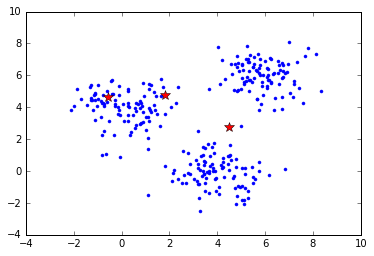

Within Set Sum of Squared Error = 784.952648546


In [263]:
kmeans(1)

[ 5.88109082  6.03094452]
[ 0.11768416  3.98838244]
[ 3.95965524 -0.06769006]


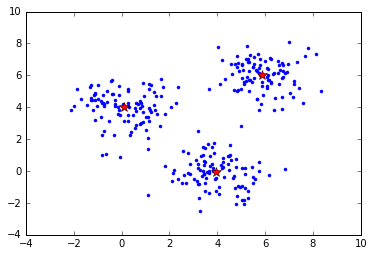

Within Set Sum of Squared Error = 372.084264264


In [197]:
kmeans(10)

[ 5.88109082  6.03094452]
[ 0.11768416  3.98838244]
[ 3.95965524 -0.06769006]


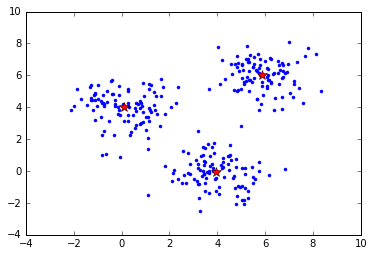

Within Set Sum of Squared Error = 372.084264264


In [202]:
kmeans(20)

[ 3.95965524 -0.06769006]
[ 5.88109082  6.03094452]
[ 0.11768416  3.98838244]


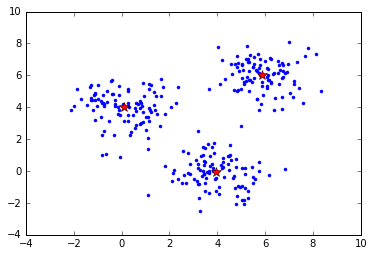

Within Set Sum of Squared Error = 372.084264264


In [373]:
kmeans(30)

[ 3.95965524 -0.06769006]
[ 5.88109082  6.03094452]
[ 0.11768416  3.98838244]


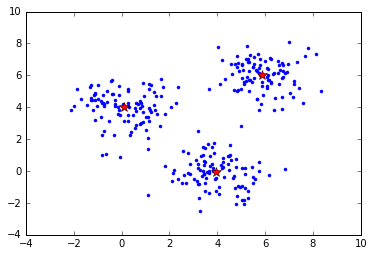

Within Set Sum of Squared Error = 372.084264264


In [374]:
kmeans(40)

[ 5.88109082  6.03094452]
[ 0.11768416  3.98838244]
[ 3.95965524 -0.06769006]


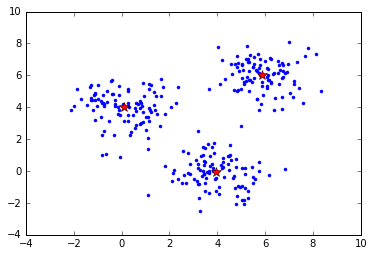

Within Set Sum of Squared Error = 372.084264264


In [375]:
kmeans(50)

[ 3.95965524 -0.06769006]
[ 0.11768416  3.98838244]
[ 5.88109082  6.03094452]


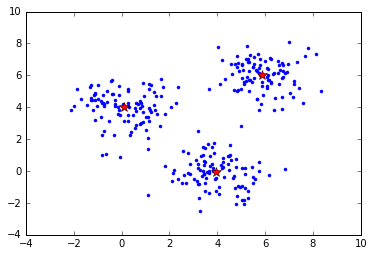

Within Set Sum of Squared Error = 372.084264264


In [201]:
kmeans(100)

#### Comments

You can see the WSSSE falling as the number of iterations increases (at least from 1 iteration to 10 iterations). After that, the WSSSE plateaus.

<a name="HW3.4"><h2 style="color:darkblue"> HW3.4: KMeans Experiments  </h2>
[Back to Table of Contents](#TOC)

Using this provided [homegrown Kmeans code](http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/3nsthvp8g2rrrdh/EM-Kmeans.ipynb)   repeat the experiments in HW3.3. Explain any differences between the results in HW3.3 and HW3.4. 

Iterations: 1
Centroids: [[ 1.06619439  0.1306071 ]
 [ 3.97156923  2.53604073]
 [ 2.11295031  5.63578993]]
Within Set Sum of Squared Error = 52.8109373576


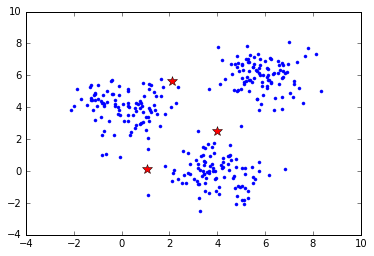

Iterations: 10
Centroids: [[ 3.95965524 -0.06769006]
 [ 5.88109082  6.03094452]
 [ 0.11768416  3.98838244]]
Within Set Sum of Squared Error = 24.1884606079


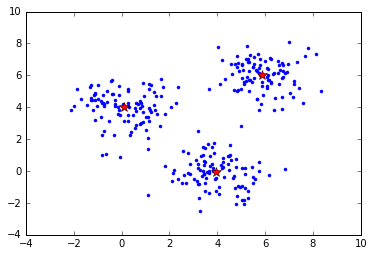

Iterations: 20
Centroids: [[ 3.95965524 -0.06769006]
 [ 5.88109082  6.03094452]
 [ 0.11768416  3.98838244]]
Within Set Sum of Squared Error = 24.1884606079


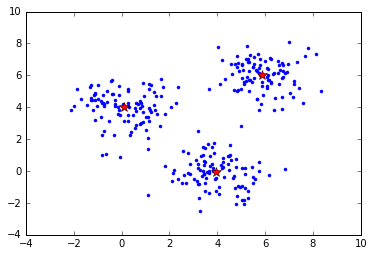

Iterations: 100
Centroids: [[ 3.95965524 -0.06769006]
 [ 5.88109082  6.03094452]
 [ 0.11768416  3.98838244]]
Within Set Sum of Squared Error = 24.1884606079


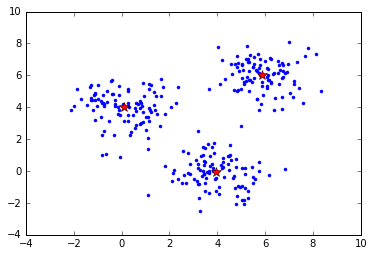

In [485]:
K = 3
# Initialization: initialization of parameter is fixed to show an example
centroids = np.array([[0.0,0.0],[2.0,2.0],[0.0,7.0]])
output_iterations = [1,10,20,100]

D = sc.textFile("data.csv").cache() 
parsedData = D.map(lambda line: array([float(x) for x in line.split(',')])).cache()
iter_num = 0

for i in range(100):
    res = D.map(nearest_centroid).reduceByKey(lambda x,y : (x[0]+y[0],x[1]+y[1])).collect()
    res = sorted(res,key = lambda x : x[0])  #sort based on clusted ID
    centroids_new = np.array([x[1][0]/x[1][1] for x in res])  #divide by cluster size

    iter_num = iter_num + 1
    centroids = centroids_new

    # add WSSSE calculation: sqrt(sum([x**2 for x in (point - center)]))
    # Minimum takes only closes centroid
    WSSSE = sqrt(parsedData.map(lambda point: min(np.sum((point - centroids)**2, axis=1))) \
                  .reduce(lambda x, y: x + y))

    if iter_num in output_iterations:
        print "Iterations:", iter_num
        print "Centroids:", centroids
        print("Within Set Sum of Squared Error = " + str(WSSSE))
        plot_iteration(centroids)


#### Comments

WSSSE is less for home grown version (I have a feeling that the homegrown WSSSE calculation might not be exactly right).  
Same thing happens though where decreases in WSSSE plateaus after the 10th iteration.

<a name="HW3.4.1"><h2 style="color:darkblue"> HW3.4.1: Making Homegrown KMeans more efficient  </h2>
[Back to Table of Contents](#TOC)

The above provided homegrown KMeans implentation in not the most efficient. How can you make it more efficient? Make this change in the code and show it work and comment on the gains you achieve. 

### HINT: have a look at  [this linear regression notebook](    http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/atzqkc0p1eajuz6/LinearRegression-Notebook-Challenge.ipynb)

We would like to broadcast the centroids to make it more efficient.

Iterations: 1
Centroids: [[ 1.06619439  0.1306071 ]
 [ 3.97156923  2.53604073]
 [ 2.11295031  5.63578993]]
Within Set Sum of Squared Error = 52.8109373576


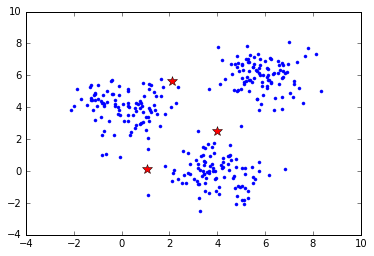

Iterations: 10
Centroids: [[ 3.95965524 -0.06769006]
 [ 5.88109082  6.03094452]
 [ 0.11768416  3.98838244]]
Within Set Sum of Squared Error = 24.1884606079


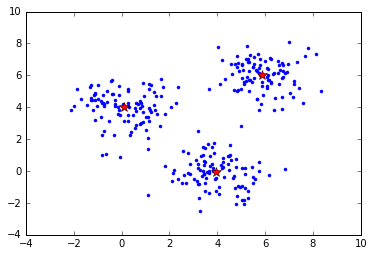

Iterations: 20
Centroids: [[ 3.95965524 -0.06769006]
 [ 5.88109082  6.03094452]
 [ 0.11768416  3.98838244]]
Within Set Sum of Squared Error = 24.1884606079


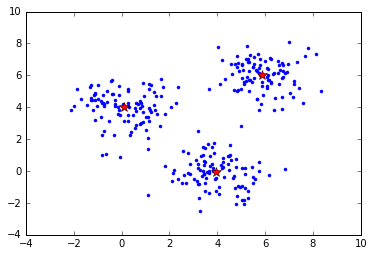

Iterations: 100
Centroids: [[ 3.95965524 -0.06769006]
 [ 5.88109082  6.03094452]
 [ 0.11768416  3.98838244]]
Within Set Sum of Squared Error = 24.1884606079


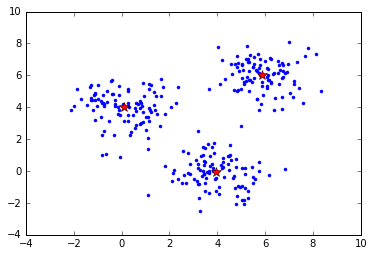

In [491]:
def nearest_centroid_broadcast(line):
    x = np.array([float(f) for f in line.split(',')])
    closest_centroid_idx = np.sum((x - cBroadcast.value)**2, axis=1).argmin()
    return (closest_centroid_idx,(x,1))

K = 3
# Initialization: initialization of parameter is fixed to show an example
centroids = np.array([[0.0,0.0],[2.0,2.0],[0.0,7.0]])
# pre-send this variable as a broadcast to the mappers

output_iterations = [1,10,20,100]

D = sc.textFile("data.csv").cache() 
parsedData = D.map(lambda line: array([float(x) for x in line.split(',')])).cache()
iter_num = 0

for i in range(100):
    cBroadcast = sc.broadcast(centroids)
    # pre-send centroid variable as a broadcast to the mappers
    
    res = D.map(nearest_centroid_broadcast).reduceByKey(lambda x,y : (x[0]+y[0],x[1]+y[1])).collect()
    res = sorted(res,key = lambda x : x[0])  #sort based on clusted ID
    centroids_new = np.array([x[1][0]/x[1][1] for x in res])  #divide by cluster size

    iter_num = iter_num + 1
    centroids = centroids_new

    # add WSSSE calculation: sqrt(sum([x**2 for x in (point - center)]))
    # Minimum takes only closes centroid
    WSSSE = sqrt(parsedData.map(lambda point: min(np.sum((point - centroids)**2, axis=1))) \
                  .reduce(lambda x, y: x + y))

    if iter_num in output_iterations:
        print "Iterations:", iter_num
        print "Centroids:", centroids
        print("Within Set Sum of Squared Error = " + str(WSSSE))
        plot_iteration(centroids)


<a name="HW3.5"><h2 style="color:darkgreen"> HW3.5: OPTIONAL Weighted KMeans  </h2>
[Back to Table of Contents](#TOC)

Using this provided [homegrown Kmeans code](http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/3nsthvp8g2rrrdh/EM-Kmeans.ipynb), modify it to do a weighted KMeans and repeat the experiements in HW3.3. Explain  any differences between the results in HW3.3 and HW3.5.

NOTE: Weight each example as follows using the inverse vector length (Euclidean norm): 

> weight(X)= 1/||X||, 

where ||X|| = SQRT(X.X)= SQRT(X1^2 + X2^2)

Here X is vector made up of two values X1 and X2.

__[Please incorporate all referenced notebooks directly into this master notebook as cells for HW submission. I.e., HW submissions should comprise of just one notebook]__

In [100]:
## Code goes here

In [101]:
## Drivers & Runners

In [102]:
## Run Scripts, S3 Sync

<a name="HW3.6"><h2 style="color:darkblue"> HW3.6 OPTIONAL Linear Regression</h2>
[Back to Table of Contents](#TOC)
<a name="HW3.6.1"><h2 style="color:darkblue"> HW3.6.1 OPTIONAL Linear Regression</h2>
[Back to Table of Contents](#TOC)

Using [this linear regression notebook](    http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/atzqkc0p1eajuz6/LinearRegression-Notebook-Challenge.ipynb):


* Generate 2 sets of data with 100 data points using the data generation code provided and plot each in separate plots. Call one the training set and the other the testing set.

* Using MLLib's LinearRegressionWithSGD train up a linear regression model with the training dataset and evaluate with the testing set. What a good number of iterations for training the linear regression model? Justify with plots (e.g., plot MSE as a function of the number of iterations) and words. 


<a name="HW3.6.2"><h2 style="color:darkblue"> HW3.6.2 OPTIONAL Linear Regression</h2>
[Back to Table of Contents](#TOC)

In the notebook provided above, in the cell labeled "Gradient descent (regularization)".

* Fill in the blanks and get this code to work for LASS0 and RIDGE linear regression.

* Using the data from 3.6.1 tune the hyper parameters of your LASS0 and RIDGE regression. Report your findings with words and plots.

In [103]:
## Code goes here

In [104]:
## Drivers & Runners

In [105]:
## Run Scripts, S3 Sync

<a name="HW3.7"><h2 style="color:darkgreen"> HW3.7 OPTIONAL Error surfaces </h2>
[Back to Table of Contents](#TOC)

Here is a link to R code with 1 test drivers that plots the linear regression model in  model space and in the domain space:

> https://www.dropbox.com/s/3xc3kwda6d254l5/PlotModelAndDomainSpaces.R?dl=0

Here is a sample output from this script: 
      
> https://www.dropbox.com/s/my3tnhxx7fr5qs0/image%20%281%29.png?dl=0

Please use this as inspiration and code a equivalent error surface and heatmap (with isolines) in Spark and show the trajectory of learning taken during gradient descent(after each n-iterations of Gradient Descent):


Using Spark and  Python (using the above R Script as inspiration), plot the error surface for the linear regression model using a heatmap and contour plot. 
Also plot the current model in the original domain space for every 10th iteration.  Plot them side by side if possible  for each iteration: lefthand side plot is the model space(w0 and w01) and the righthand side plot is domain space (plot the corresponding model and training data in the problem domain space) with a final pair of graphs showing the entire trajectory in the model and domain space. Make sure to label your plots with iteration numbers, function, model space versus original domain space, MSE on the training data etc.

Also plot the MSE as a function of each iteration (possibly every 10th iteration). Dont forget to label both axis and the graph also. __[Please incorporate all referenced notebooks directly into this master notebook as cells for HW submission. I.e., HW submissions should comprise of just one notebook]__





In [106]:
## Code goes here

In [107]:
## Drivers & Runners

In [108]:
## Run Scripts, S3 Sync

[Back to Table of Contents](#TOC)
<center><div class='jumbotron'><h2 style='color:green'>-------  END OF HWK 9 --------</h2></div></center>